In [1]:
import pandas as pd
import numpy as np


In [2]:
print(pd.read_excel('C:/Users/jhjh3/class/datasalon-master/02_data_class/4_Tourists_Event/files/kto_201901.xlsx'))

   2019년 01월 외래객 입국-목적별/국적별 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0                        국적         관광         상용         공용      유학/연수   
1                      아시아주     765082      10837       1423      14087   
2                        일본     198805       2233        127        785   
3                        대만      86393         74         22        180   
4                        홍콩      34653         59          2         90   
..                      ...        ...        ...        ...        ...   
67                       교포          0          0          0          0   
68                        계     884293      13675       4439      15995   
69                     전년동기     742732      14663       4126      13858   
70                   성장률(%)       19.1       -6.7        7.6       15.4   
71                   구성비(%)         80        1.2        0.4        1.4   

   Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  
0          기타          계       전년동기    

In [3]:
kto_201901 = pd.read_excel('C:/Users/jhjh3/class/datasalon-master/02_data_class/4_Tourists_Event/files/kto_201901.xlsx',
                           header = 1, 
                           usecols = 'A:G',
                           skipfooter = 4)

kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [4]:
def cret_kto_data(yy,mm):
    file_path = 'C:/Users/jhjh3/class/datasalon-master/02_data_class/4_Tourists_Event/files/kto_{}{}.xlsx'/format(yy, mm)
    df = pd.read_excel(file_path, header=1, skipfooter =4, use='A:G')
    df['기준년월'] = '{}-{}'.format(yy, mm)
    
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    condition = (df['국적'].isin(ignore_list))
    df_country = df[~condition].rest_index(drop=True)
    
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents
    
    df_country['관광객비율(%)'] = round(df_country['관광']*100/df_country['계'], 1)
    
    df_country['전체비율(%)'] = round(df_country['관광']*100/sum(df_country['관광']), 1)
    
    return(df_country)
    

In [11]:
df = pd.DataFrame()

for yy in range(2010, 2021):
    for mm in range(1,13):
        try:
            mm_str = str(mm).zfill(2)
            yymm='{}{}'.format(yy, mm_str)
            temp=creat_kto_data(str(yy), mm_str)
            df=df.append(temp, ignore_index=True)
        except:
            pass
    print(yymm)

201012
201112
201212
201312
201412
201512
201612
201712
201812
201912
202012


In [12]:
df = pd.read_excel('C:/Users/jhjh3/class/datasalon-master/02_data_class/4_Tourists_Event/files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [13]:
cntry_list = df['국적'].unique()
cntry_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [14]:
cntry_list = df['국적'].unique()

for cntry in cntry_list:
    condition = df['국적'] == cntry
    df_filter = df[condition]
    
    file_path ='C:/Users/jhjh3/class/datasalon-master/02_data_class/4_Tourists_Event/files/[국적별 관광객 데이터]{}.xlsx'.format(cntry)
    # df_filter.to_excel(file_path, index = False)

In [15]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [16]:
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()

rc('font', family = font_name)

In [17]:
import matplotlib.pyplot as plt

In [18]:
condition = df['국적']=='중국'
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


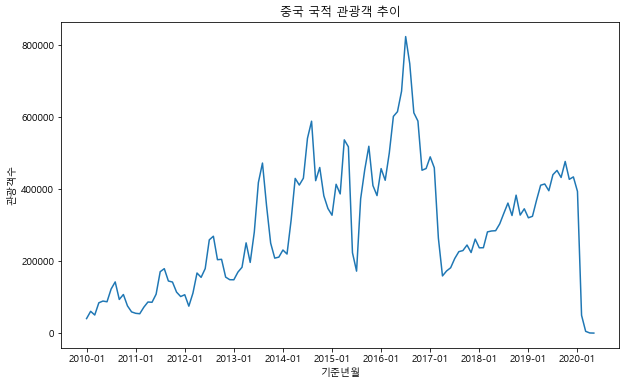

In [19]:
plt.figure(figsize = (10,6))
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.title('중국 국적 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
plt.show()

In [20]:
cntry_list = ['중국','일본','대만','미국','홍콩']

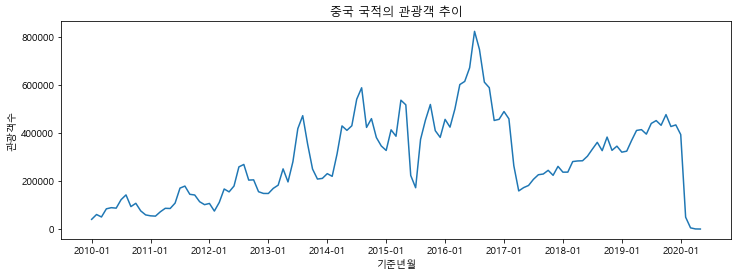

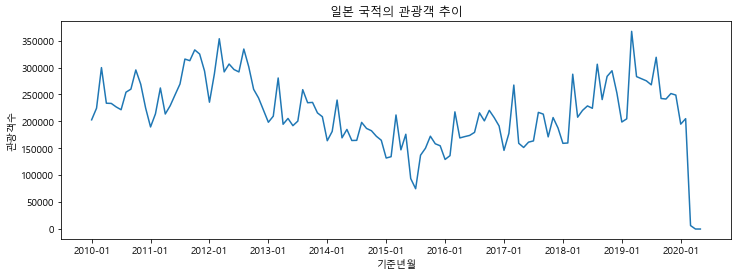

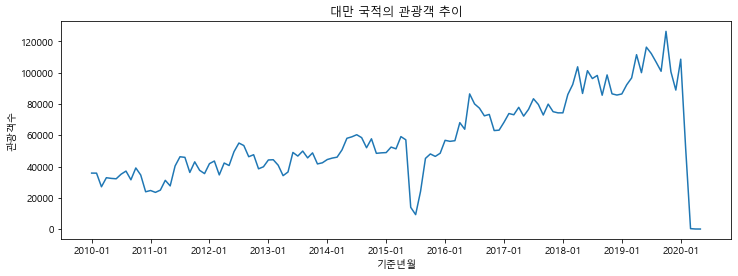

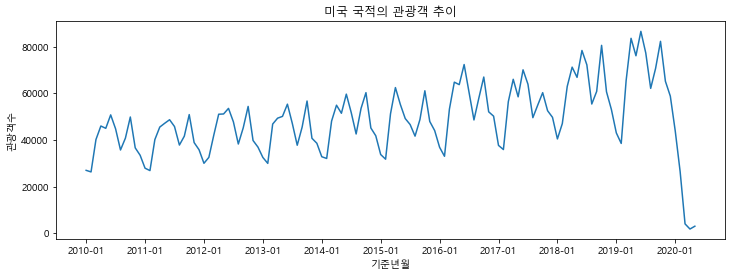

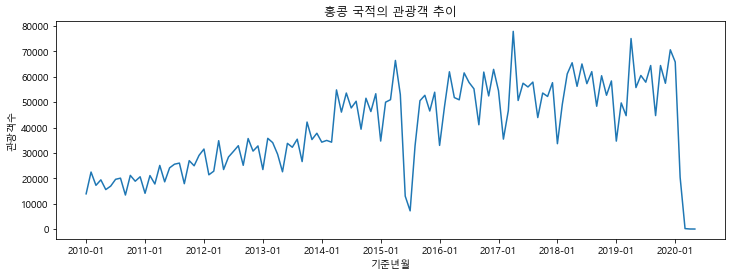

In [21]:
for cntry in cntry_list:
    condition = df['국적'] == cntry
    df_filter = df[condition]
    
    plt.figure(figsize = (12,4))
    
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
    plt.show()

In [22]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [23]:
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)

df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [24]:
condition = df['국적'] == '중국'

df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [25]:
df_pivot = df_filter.pivot_table(values = '관광',
                                index = '년도',
                                columns = '월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [26]:
import seaborn as sns

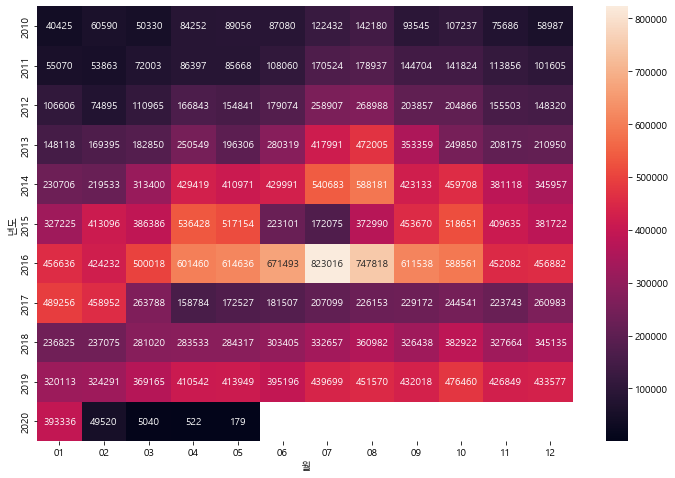

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_pivot,
           annot = True,
           fmt = '.0f')
plt.show()

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights_pivot = flights.pivot_table(values = 'passengers',
                                  index = 'year',
                                  columns = 'month')
flights_pivot 

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


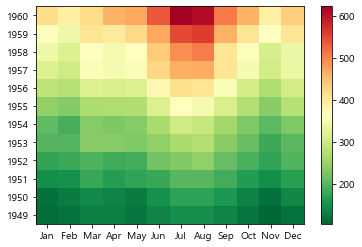

In [ ]:
plt.pcolor(flights_pivot, cmap = 'RdYlGn_r')
plt.xticks(np.arange(0.5, len(flights_pivot.columns)),
          flights_pivot.columns)
plt.yticks(np.arange(0.5, len(flights_pivot.index)),
          flights_pivot.index)
plt.colorbar()
plt.show()

In [ ]:
np.arange(0.5, len(flights_pivot.columns))

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5])

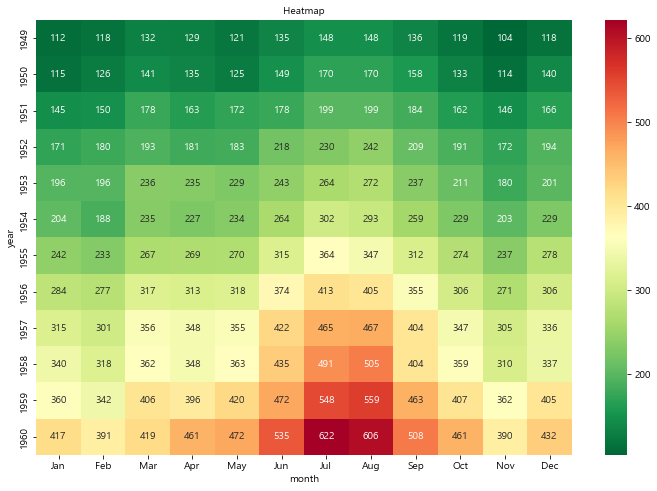

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(flights_pivot,
           annot = True,
           fmt = 'd', cmap = 'RdYlGn_r',
           annot_kws = {'size':10})
plt.title('Heatmap', fontsize = 10)
plt.show()

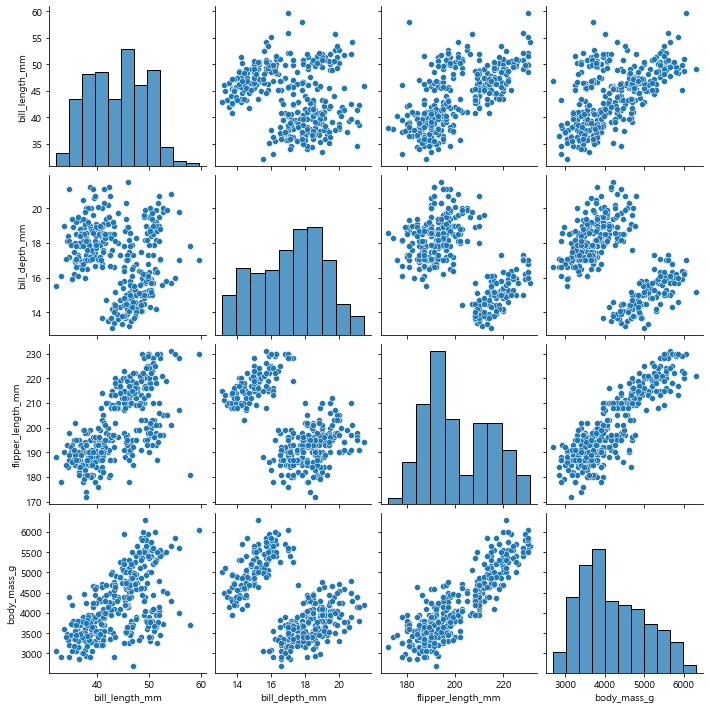

In [ ]:
penguins = sns.load_dataset('penguins')
sns.pairplot(penguins)

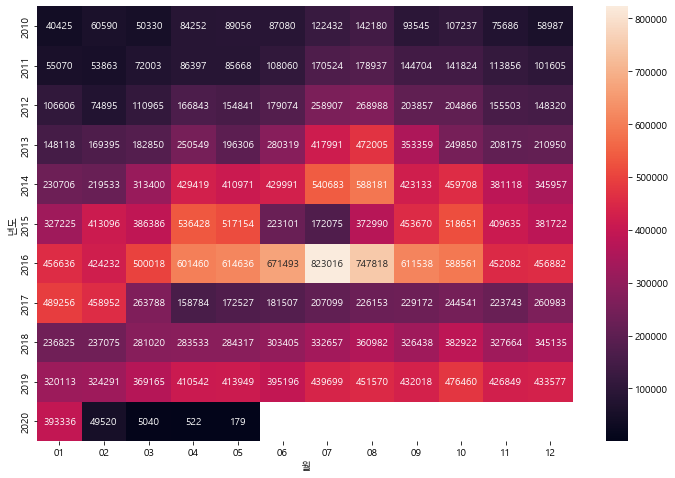

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_pivot,
           annot = True,
           fmt = '.0f')
plt.show()

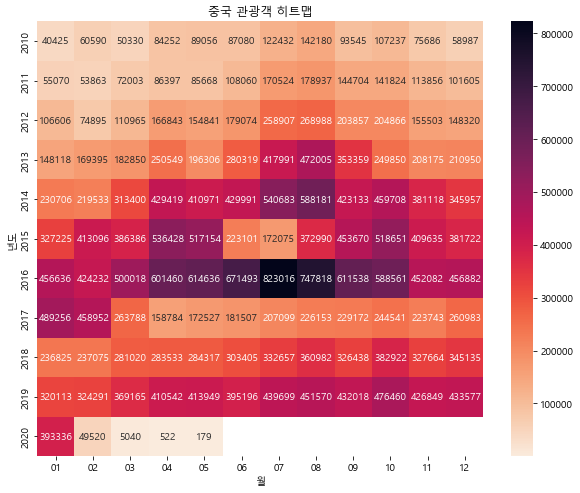

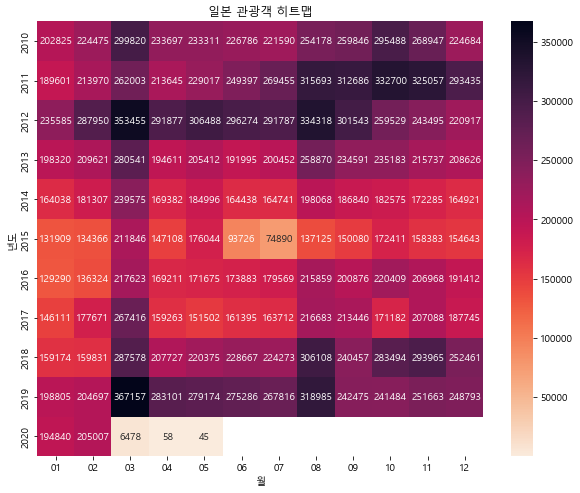

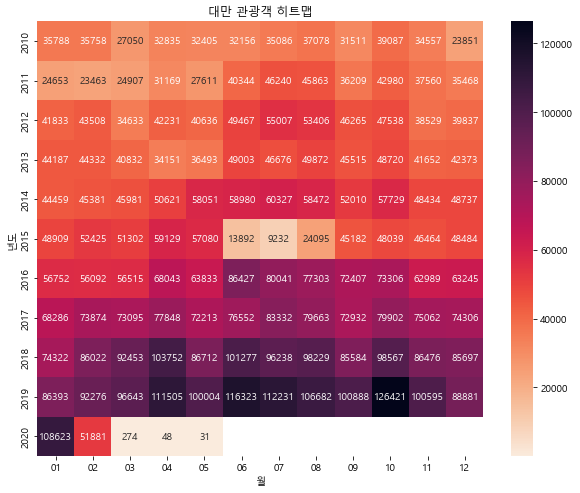

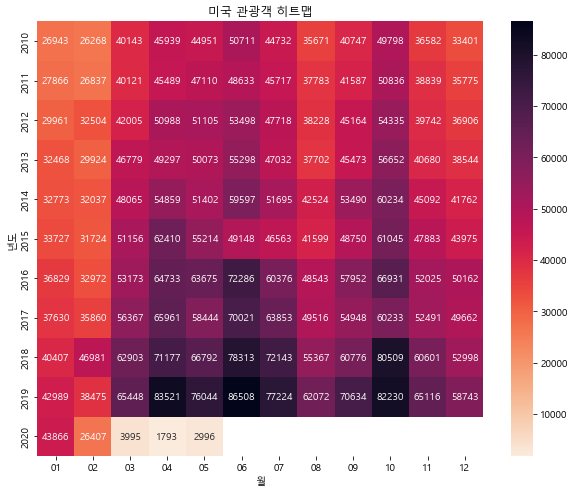

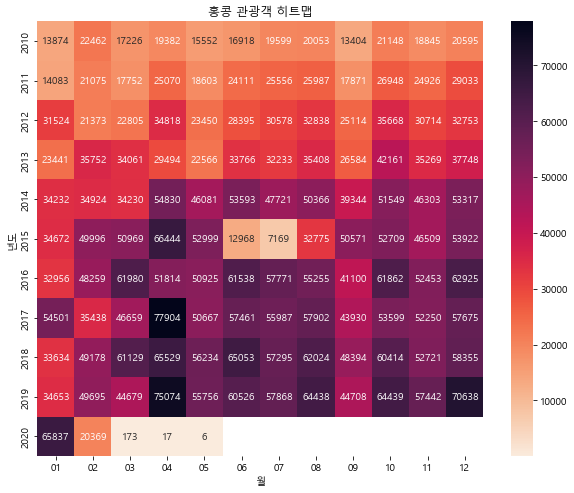

In [ ]:
# cntry_list

for cntry in cntry_list:
    condition =  df['국적'] == cntry
    
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광',
                                    index = '년도',
                                    columns = '월')
    
    plt.figure(figsize = (10, 8))
    
    sns.heatmap(df_pivot, annot = True,
               fmt = '.0f',
               cmap = 'rocket_r')
    
    plt.title('{} 관광객 히트맵'.format(cntry))
    
    plt.show()    